# code 4

## Revision changes

1. Trail n-grams. testing results with RF (max_depth=20, n_estimators=100).
2. Create an iterator for ngram 
    - (1, x), where x is 1 to 9
    - (2, x), where x is 2 to 6 (best score for (1,x)
    - (3, x), where x is 3 to 6 (best score for (1,x)  
3. Collate results

example executive summary [here](https://www.proposify.biz/blog/executive-summary)

In [2]:
import requests
import pandas as pd
import numpy as np
import time

# Import train test split
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#import confusion matrix fxn
from sklearn.metrics import confusion_matrix, plot_roc_curve

#### 1. Engineer a feature to turn `source_feature` into a 1/0 column, where 1 indicates `stocks` subreddit.

In [2]:
df = pd.read_csv('data.csv')

#### 2. Split our data into `X` and `y`.

In [137]:
X = df[['title']]
y = df['stocks']

#### 3. Split our data into training and testing sets.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [140]:
results = pd.DataFrame(columns=['model','parameters','train','test'])

#### 4.1 Fit a Random Forest model!

In [141]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
np.random.seed(42)

### rf against n_gram

## try with ngram (1,x)

In [139]:
# create multiple sets of train-test with range of ngram 1-5
X_train_ls = []
X_test_ls = []

for i in range(1,10):
    tvec = TfidfVectorizer(max_features = 500, stop_words = 'english',ngram_range=(1, i))
    
    X_train_ls.append(pd.DataFrame(tvec.fit_transform(X_train['title']).todense(),
                              columns = tvec.get_feature_names()))
    X_test_ls.append(pd.DataFrame(tvec.transform(X_test['title']).todense(),
                             columns = tvec.get_feature_names()))

In [142]:
rf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state = 42)

for i in range(9):
    print(f'ngram = (1,{i+1})')
    cv_scores = cross_val_score(rf, X_train_ls[i], y_train, cv=10)
    print(f'rf: {cv_scores.mean()}')
    print(f'mean-to-max CV scores: {cv_scores.mean()/cv_scores.max()}')
    print('='*12)

ngram = (1,1)
rf: 0.6094128615714518
mean-to-max CV scores: 0.9624988649331843
ngram = (1,2)
rf: 0.6080020045218284
mean-to-max CV scores: 0.9692166785565665
ngram = (1,3)
rf: 0.6095873637430171
mean-to-max CV scores: 0.9649674446978026
ngram = (1,4)
rf: 0.6080892556076108
mean-to-max CV scores: 0.9612552996025604
ngram = (1,5)
rf: 0.608266010923867
mean-to-max CV scores: 0.9778780770518258
ngram = (1,6)
rf: 0.6112633149197026
mean-to-max CV scores: 0.9744155371262114
ngram = (1,7)
rf: 0.6086191330831566
mean-to-max CV scores: 0.9661296727963395
ngram = (1,8)
rf: 0.60817868214344
mean-to-max CV scores: 0.9708618906227909
ngram = (1,9)
rf: 0.6085308719669953
mean-to-max CV scores: 0.9769201409936912


In [143]:
for i in range(9):
    rf.fit(X_train_ls[i],y_train)
    print(f'ngram = (1,{i+1})')
    print(f'Train: {rf.score(X_train_ls[i], y_train)}')
    print(f'Test: {rf.score(X_test_ls[i], y_test)}')
    print('='*12)
    new_model = pd.DataFrame([[rf.base_estimator_,{'max_depth':5, 'n_estimators':200,'n_gram':(1,i+1)},rf.score(X_train_ls[i], y_train),rf.score(X_test_ls[i], y_test)]],columns=results.columns.tolist())
    results = results.append(new_model,ignore_index=True)

ngram = (1,1)
Train: 0.690314620604565
Test: 0.5960877610362146
ngram = (1,2)
Train: 0.6912840398343174
Test: 0.5974094633888448
ngram = (1,3)
Train: 0.6911077817925443
Test: 0.5971451229183188
ngram = (1,4)
Train: 0.686789459769102
Test: 0.5955590800951626
ngram = (1,5)
Train: 0.6886401692077201
Test: 0.5979381443298969
ngram = (1,6)
Train: 0.6875826209570811
Test: 0.5921226539783241
ngram = (1,7)
Train: 0.6893452013748127
Test: 0.5974094633888448
ngram = (1,8)
Train: 0.6869657178108751
Test: 0.5892149088025377
ngram = (1,9)
Train: 0.6888164272494932
Test: 0.5945017182130584


## try with min (2,x)

In [144]:
# create multiple sets of train-test with range of ngram 2-6 (choose 6 because (1,5) was the best score for (1,x) trails)
X_train_ls = []
X_test_ls = []

for i in range(2,7):
    tvec = TfidfVectorizer(max_features = 500, stop_words = 'english',s)
    
    X_train_ls.append(pd.DataFrame(tvec.fit_transform(X_train['title']).todense(),
                              columns = tvec.get_feature_names()))
    X_test_ls.append(pd.DataFrame(tvec.transform(X_test['title']).todense(),
                             columns = tvec.get_feature_names()))

In [145]:
rf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state = 42)

for i in range(len(X_train_ls)):
    print(f'ngram = (2,{i+2})')
    cv_scores = cross_val_score(rf, X_train_ls[i], y_train, cv=10)
    print(f'rf: {cv_scores.mean()}')
    print(f'mean-to-max CV scores: {cv_scores.mean()/cv_scores.max()}')
    print('='*12)

ngram = (2,2)
rf: 0.5457822685282303
mean-to-max CV scores: 0.9709449447955195
ngram = (2,3)
rf: 0.5478968059731643
mean-to-max CV scores: 0.9656255819558097
ngram = (2,4)
rf: 0.5462224863840136
mean-to-max CV scores: 0.9732535667909818
ngram = (2,5)
rf: 0.5472812313047261
mean-to-max CV scores: 0.9736115948759625
ngram = (2,6)
rf: 0.5471920378528308
mean-to-max CV scores: 0.9734529200046441


In [146]:
for i in range(len(X_train_ls)):
    rf.fit(X_train_ls[i],y_train)
    print(f'ngram = (2,{i+2})')
    print(f'Train: {rf.score(X_train_ls[i], y_train)}')
    print(f'Test: {rf.score(X_test_ls[i], y_test)}')
    print('='*12)
    new_model = pd.DataFrame([[rf.base_estimator_,{'max_depth':5, 'n_estimators':200,'n_gram':(2,i+1)},rf.score(X_train_ls[i], y_train),rf.score(X_test_ls[i], y_test)]],columns=results.columns.tolist())
    results = results.append(new_model,ignore_index=True)

ngram = (2,2)
Train: 0.5740724420551687
Test: 0.5440126883425852
ngram = (2,3)
Train: 0.5714285714285714
Test: 0.542690985989955
ngram = (2,4)
Train: 0.5705472812197057
Test: 0.5477134549299498
ngram = (2,5)
Train: 0.569842249052613
Test: 0.5453343906952154
ngram = (2,6)
Train: 0.5708997973032519
Test: 0.5466560930478456


## try with min (3,x)

In [147]:
# create multiple sets of train-test with range of ngram 3-6
X_train_ls = []
X_test_ls = []

for i in range(3,7):
    tvec = TfidfVectorizer(max_features = 500, stop_words = 'english',ngram_range=(2, i))
    
    X_train_ls.append(pd.DataFrame(tvec.fit_transform(X_train['title']).todense(),
                              columns = tvec.get_feature_names()))
    X_test_ls.append(pd.DataFrame(tvec.transform(X_test['title']).todense(),
                             columns = tvec.get_feature_names()))

In [148]:
rf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state = 42)

for i in range(len(X_train_ls)):
    print(f'ngram = (3,{i+3})')
    cv_scores = cross_val_score(rf, X_train_ls[i], y_train, cv=10)
    print(f'rf: {cv_scores.mean()}')
    print(f'mean-to-max CV scores: {cv_scores.mean()/cv_scores.max()}')
    print('='*12)

ngram = (3,3)
rf: 0.5478968059731643
mean-to-max CV scores: 0.9656255819558097
ngram = (3,4)
rf: 0.5462224863840136
mean-to-max CV scores: 0.9732535667909818
ngram = (3,5)
rf: 0.5472812313047261
mean-to-max CV scores: 0.9736115948759625
ngram = (3,6)
rf: 0.5471920378528308
mean-to-max CV scores: 0.9734529200046441


In [149]:
for i in range(len(X_train_ls)):
    rf.fit(X_train_ls[i],y_train)
    print(f'ngram = (3,{i+3})')
    print(f'Train: {rf.score(X_train_ls[i], y_train)}')
    print(f'Test: {rf.score(X_test_ls[i], y_test)}')
    print('='*12)
    new_model = pd.DataFrame([[rf.base_estimator_,{'max_depth':5, 'n_estimators':200,'n_gram':(3,i+1)},rf.score(X_train_ls[i], y_train),rf.score(X_test_ls[i], y_test)]],columns=results.columns.tolist())
    results = results.append(new_model,ignore_index=True)

ngram = (3,3)
Train: 0.5714285714285714
Test: 0.542690985989955
ngram = (3,4)
Train: 0.5705472812197057
Test: 0.5477134549299498
ngram = (3,5)
Train: 0.569842249052613
Test: 0.5453343906952154
ngram = (3,6)
Train: 0.5708997973032519
Test: 0.5466560930478456


# plot the results and how ngram affects results

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
n_grams = [str(x['n_gram']) for x in results['parameters']]
test = results['test']

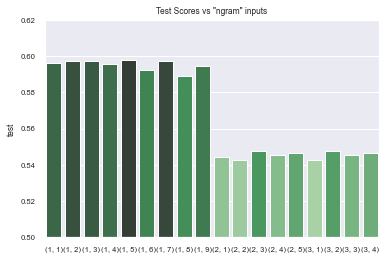

In [154]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = .7)
pal = sns.color_palette("Greens_d", len(test))
rank = test.argsort().argsort()  # http://stackoverflow.com/a/6266510/1628638
plt.ylim(.5,.62)

sns.barplot(x=n_grams,y=test, palette=np.array(pal)[rank]).set(title='Test Scores vs "ngram" inputs');

In [14]:
results['parameters'].to_list()[0]

"{'max_depth': 5, 'n_estimators': 200, 'n_gram': (1, 1)}"

# saving results to csv

In [153]:
results['vectorizer'] = 'TfidfVectorizer'

In [155]:
results.to_csv('code4_results.csv',index_label=False)

In [7]:
results = pd.read_csv('./results/code4_results.csv')

In [9]:
results.sort_values(by='test',ascending=False)

,Unnamed: 0,model,parameters,train,test,vectorizer
4,4,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.688640,0.597938,TfidfVectorizer
6,6,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.689345,0.597409,TfidfVectorizer
1,1,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.691284,0.597409,TfidfVectorizer
2,2,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.691108,0.597145,TfidfVectorizer
0,0,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.690315,0.596088,TfidfVectorizer
3,3,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.686789,0.595559,TfidfVectorizer
8,8,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.688816,0.594502,TfidfVectorizer
5,5,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.687583,0.592123,TfidfVectorizer
7,7,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.686966,0.589215,TfidfVectorizer
15,15,DecisionTreeClassifier(),"{'max_depth': 5, 'n_estimators': 200, 'n_gram'...",0.570547,0.547713,TfidfVectorizer


# Conclusion
ngram = (1,5)  
Train: 0.688640  
Test: 0.597938 

ngram (1,5) appears to be the best.  
increasing max ngram past does improve however this may be due to collinearity  
increasing min ngram does not show to improve the performance